In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,NaN,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,NaN,137.0,40.0,35.0,168.0,NaN,NaN,33.0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               635 non-null    float64
 1   Glucose                   654 non-null    float64
 2   BloodPressure             680 non-null    float64
 3   SkinThickness             624 non-null    float64
 4   Insulin                   680 non-null    float64
 5   BMI                       684 non-null    float64
 6   DiabetesPedigreeFunction  590 non-null    float64
 7   Age                       655 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,635.000000,654.000000,680.000000,624.000000,680.000000,684.000000,590.000000,655.000000,768.000000
mean,3.700787,113.422018,68.786765,20.386218,80.123529,32.083626,0.466676,33.157252,0.348958
std,3.518126,202.816831,19.724841,15.987049,115.681140,7.800741,0.322408,13.829831,0.476951
min,-22.000000,-5000.000000,-2.000000,0.000000,0.000000,0.000000,0.078000,-150.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.375000,0.243250,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,34.000000,32.300000,0.368000,29.000000,0.000000
75%,6.000000,140.750000,80.000000,32.000000,129.250000,36.600000,0.611500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.329000,81.000000,1.000000


In [5]:
print(df.isna().sum())

Pregnancies                 133
Glucose                     114
BloodPressure                88
SkinThickness               144
Insulin                      88
BMI                          84
DiabetesPedigreeFunction    178
Age                         113
Outcome                       0
dtype: int64


In [6]:
na_percent = df.isna().sum() / df.count()
print(na_percent)

Pregnancies                 0.209449
Glucose                     0.174312
BloodPressure               0.129412
SkinThickness               0.230769
Insulin                     0.129412
BMI                         0.122807
DiabetesPedigreeFunction    0.301695
Age                         0.172519
Outcome                     0.000000
dtype: float64


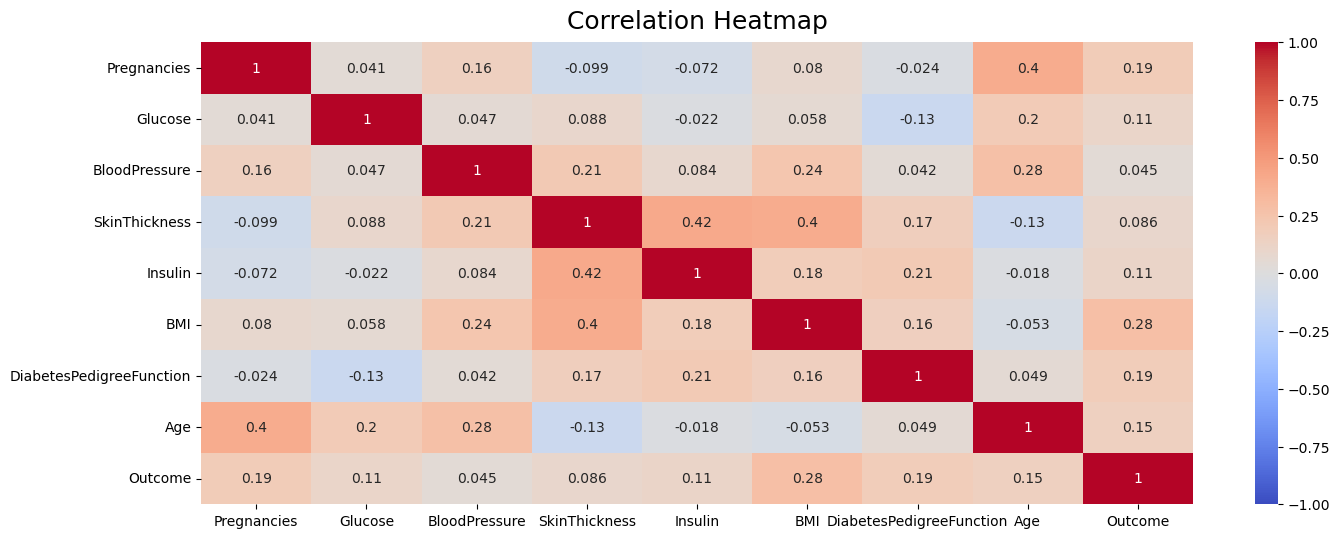

In [7]:
rr = pd.DataFrame(df, columns=df.columns)
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(rr.corr(),cmap='coolwarm', vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=10);
plt.savefig('CorrelationHeatmap.png', dpi=300, bbox_inches='tight')

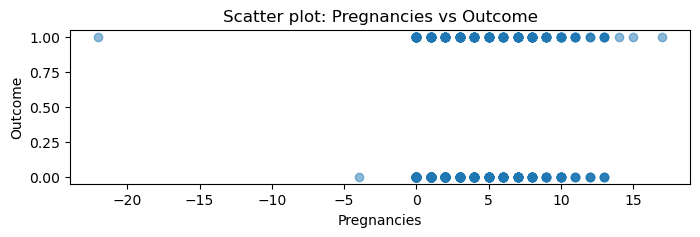

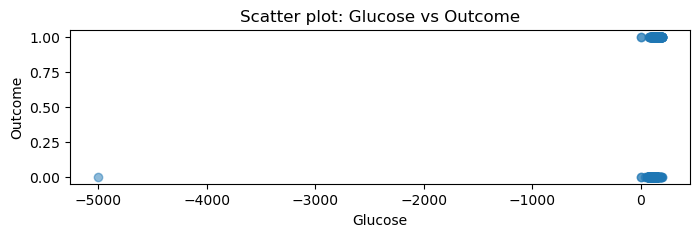

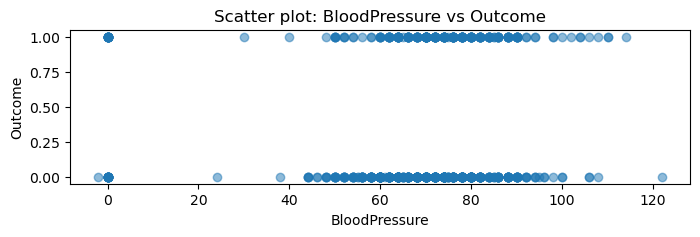

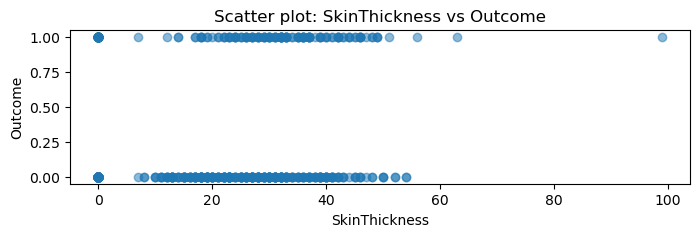

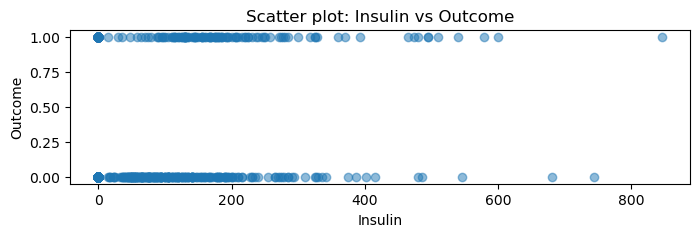

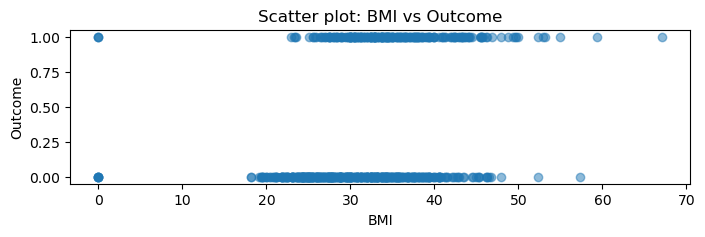

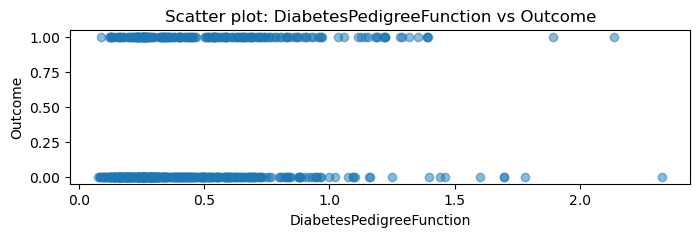

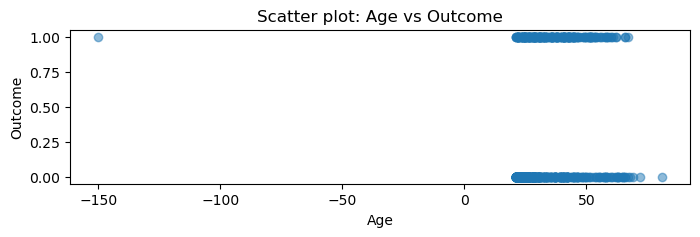

In [8]:
properties = df.columns[:8]
outcome = df.columns[8]

# Create scatter plots of each property against the outcome
for prop in properties:
    plt.figure(figsize=(8, 2))
    plt.scatter(df[prop], df[outcome], alpha=0.5)
    plt.xlabel(prop)
    plt.ylabel(outcome)
    plt.title(f'Scatter plot: {prop} vs {outcome}')
    plt.savefig(f'{prop} scatter.png', dpi=300, bbox_inches='tight')
    plt.show()

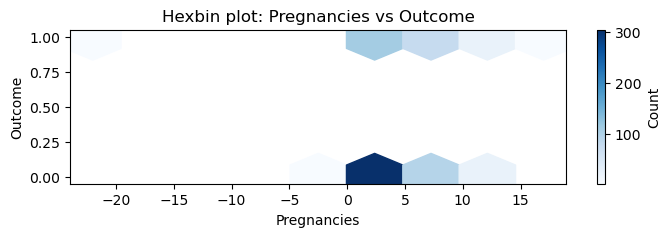

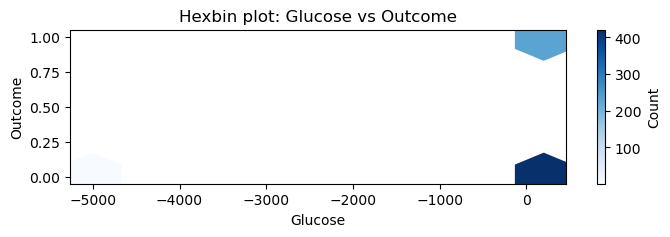

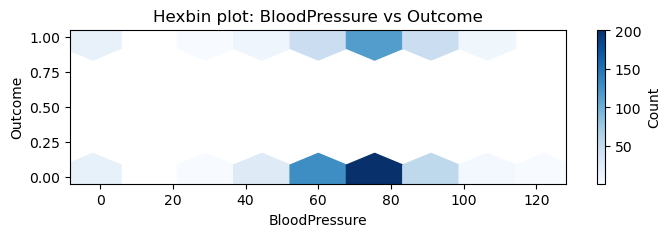

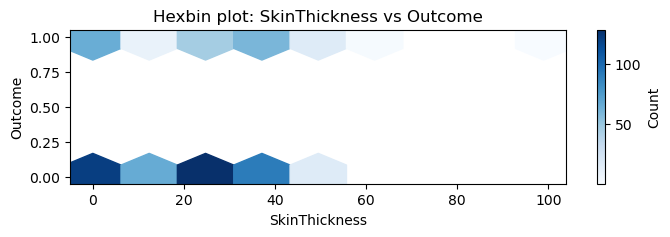

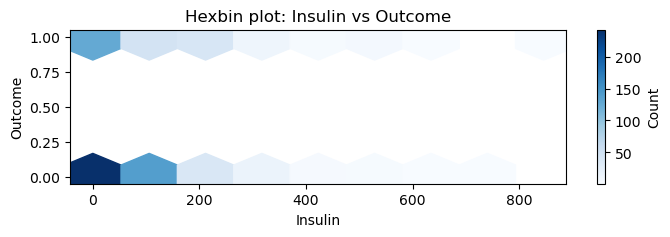

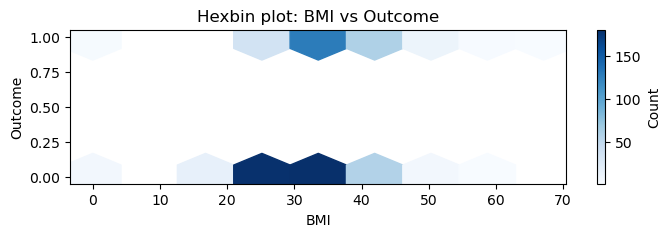

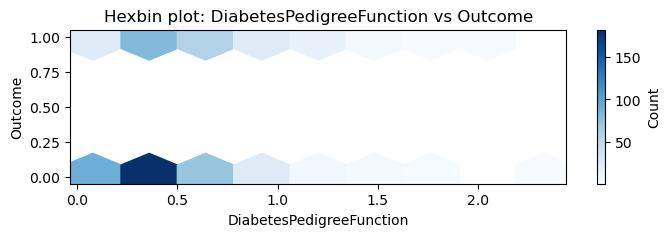

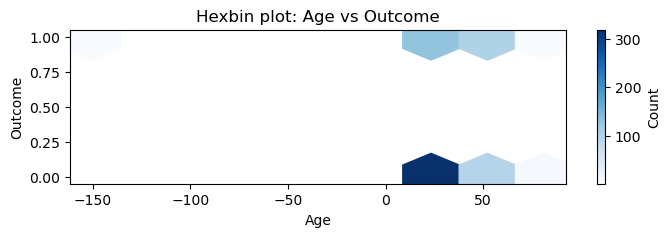

In [9]:
for prop in properties:
    plt.figure(figsize=(8, 2))
    plt.hexbin(df[prop], df[outcome], gridsize=(8,2), cmap='Blues', mincnt=1)
    plt.colorbar(label='Count')
    plt.xlabel(prop)
    plt.ylabel(outcome)
    plt.title(f'Hexbin plot: {prop} vs {outcome}')
    plt.savefig(f'{prop} hexbin.png', dpi=300, bbox_inches='tight')
    plt.show()

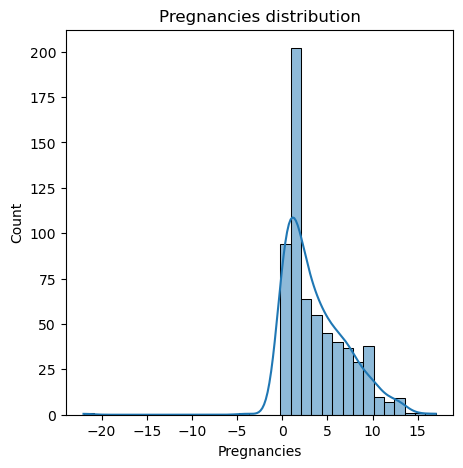

Skewness before handling outliers: 0.25119300958076385


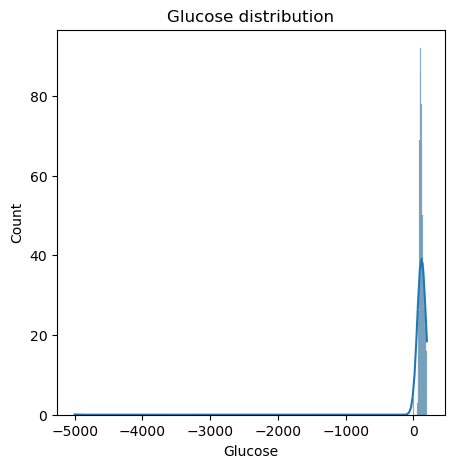

Skewness before handling outliers: -24.61344403347621


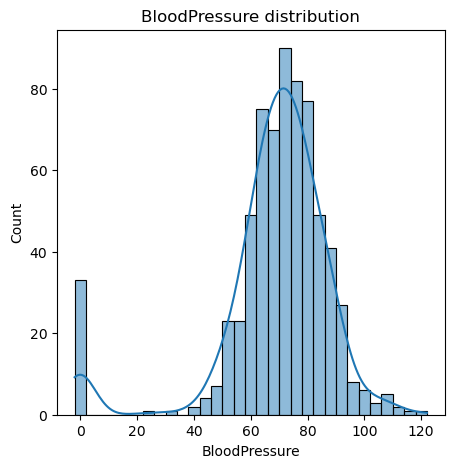

Skewness before handling outliers: -1.8253459692589389


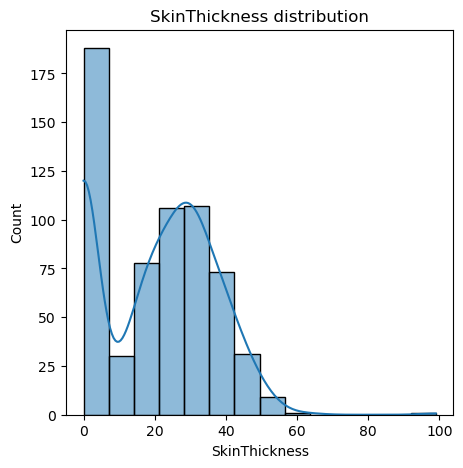

Skewness before handling outliers: 0.16367433742615353


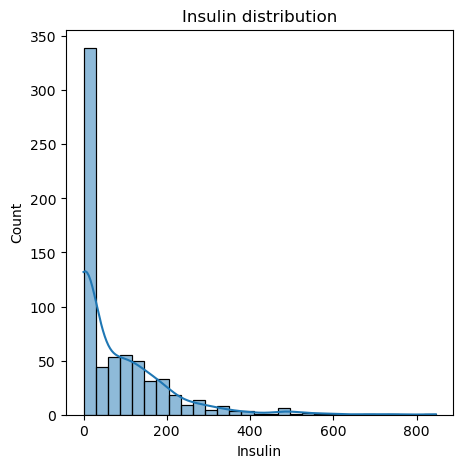

Skewness before handling outliers: 2.3034858433468486


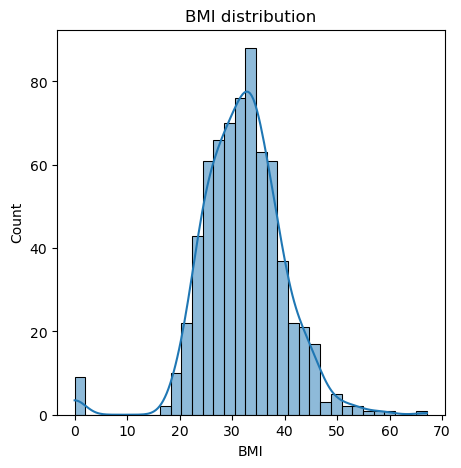

Skewness before handling outliers: -0.3518233404639664


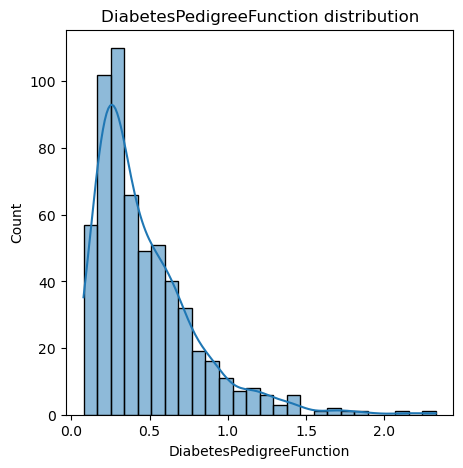

Skewness before handling outliers: 1.7862738506407356


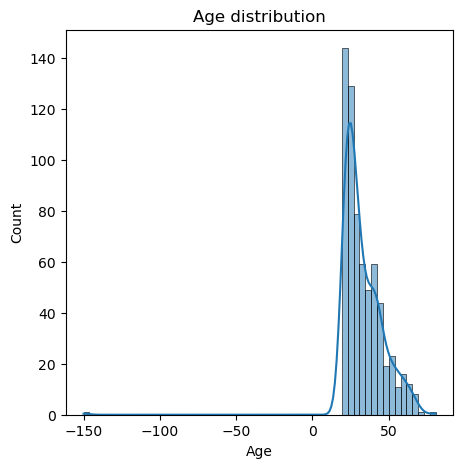

Skewness before handling outliers: -2.8322153066850246


In [10]:
for prop in properties:
    plt.figure(figsize=(5, 5))
    sns.histplot(df[prop], kde=True)
    plt.title(f'{prop} distribution')
    plt.savefig(f'{prop} distribution.png', dpi=300, bbox_inches='tight')
    plt.show()
    print('Skewness before handling outliers:', df[prop].skew())

1.0
6.0


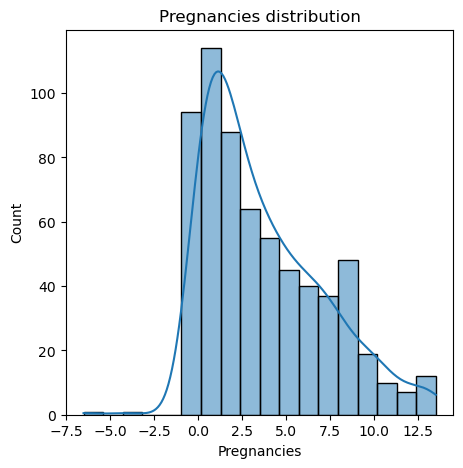

Skewness after handling outliers: 0.8501050952581052
99.0
140.75


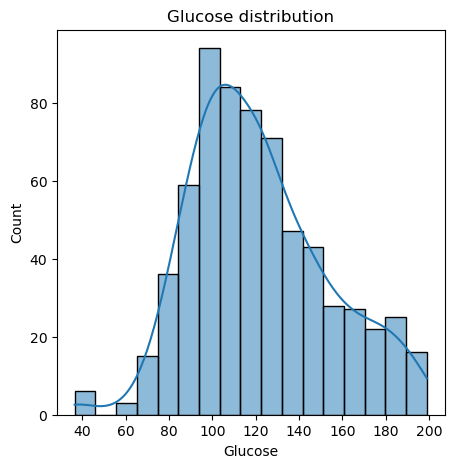

Skewness after handling outliers: 0.41643660626781015
62.0
80.0


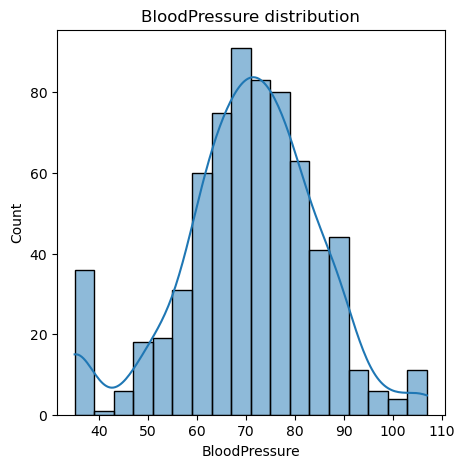

Skewness after handling outliers: -0.39650632263573593
0.0
32.0


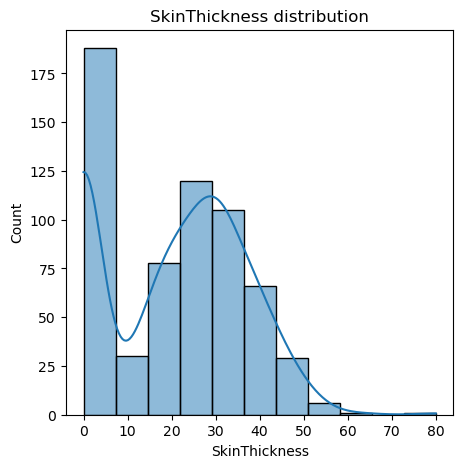

Skewness after handling outliers: 0.06288445944911611
0.0
129.25


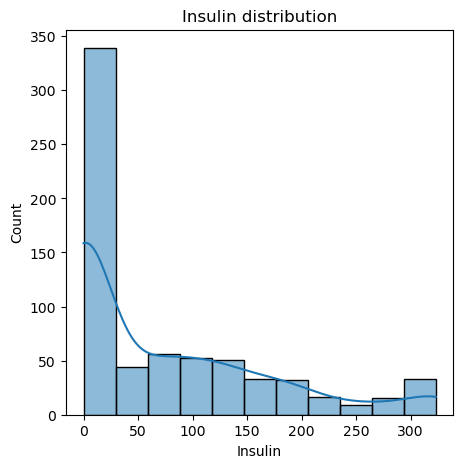

Skewness after handling outliers: 1.1857977111267106
27.375
36.6


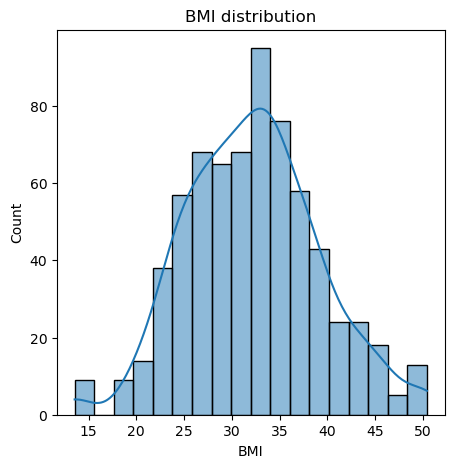

Skewness after handling outliers: 0.1648869399826227
0.24325
0.6114999999999999


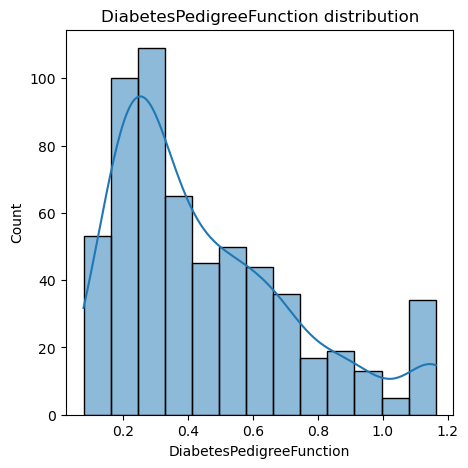

Skewness after handling outliers: 1.0098876086271154
24.0
41.0


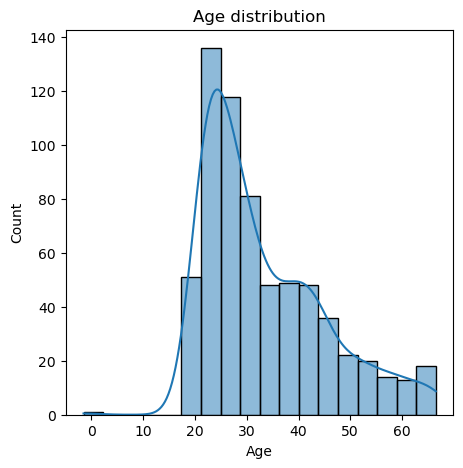

Skewness after handling outliers: 0.9892294087959143


In [11]:
for prop in properties:
    Q1 = df[prop].quantile(0.25)
    print(Q1)
    Q3 = df[prop].quantile(0.75)
    print(Q3)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    df[prop] = np.where(df[prop] < lower_bound, lower_bound, df[prop])
    df[prop] = np.where(df[prop] > upper_bound, upper_bound, df[prop])
    plt.figure(figsize=(5, 5))
    sns.histplot(df[prop], kde=True)
    plt.title(f'{prop} distribution')
    plt.savefig(f'{prop} distributionModified.png', dpi=300, bbox_inches='tight')
    plt.show()
    print('Skewness after handling outliers:', df[prop].skew())

In [12]:
print(df.isna().sum())

Pregnancies                 133
Glucose                     114
BloodPressure                88
SkinThickness               144
Insulin                      88
BMI                          84
DiabetesPedigreeFunction    178
Age                         113
Outcome                       0
dtype: int64


In [13]:
for prop in properties:
    non_negative_mean = df[df[prop] >= 0][prop].mean()
    df.loc[df[prop] < 0, prop] = non_negative_mean
    df[prop].fillna(df[prop].mean(), inplace=True)
print(df.isna().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [14]:
from sklearn.model_selection import train_test_split
properties = df.columns[:8]
outcome = df.columns[8]
X_train, X_test, y_train, y_test = train_test_split(df[properties], df[outcome], test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Optimized parameters for LogisticRegression: {'C': 10, 'solver': 'lbfgs'}
Test accuracy for LogisticRegression: 0.7532467532467533
Test precision for LogisticRegression: 0.6888888888888889


<Figure size 640x480 with 0 Axes>

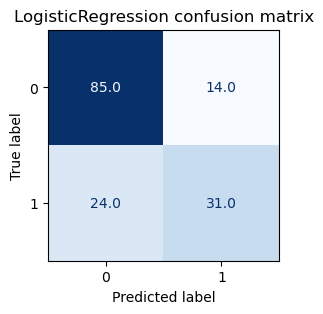

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Optimized parameters for KNN: {'n_neighbors': 15}
Test accuracy for KNN: 0.7142857142857143
Test precision for KNN: 0.6486486486486487


<Figure size 300x300 with 0 Axes>

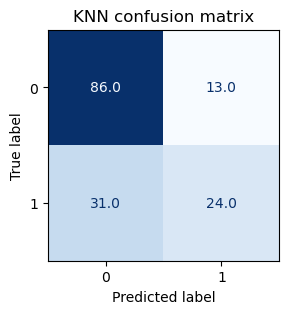

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Optimized parameters for DecisionTree: {'max_depth': 10, 'min_samples_split': 20}
Test accuracy for DecisionTree: 0.7272727272727273
Test precision for DecisionTree: 0.6140350877192983


<Figure size 300x300 with 0 Axes>

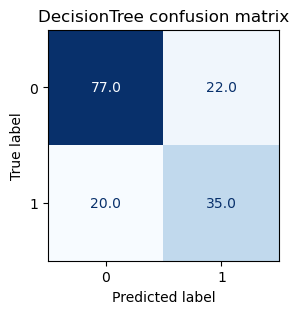

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Optimized parameters for RandomForest: {'max_features': 'log2', 'n_estimators': 50}
Test accuracy for RandomForest: 0.7012987012987013
Test precision for RandomForest: 0.5849056603773585


<Figure size 300x300 with 0 Axes>

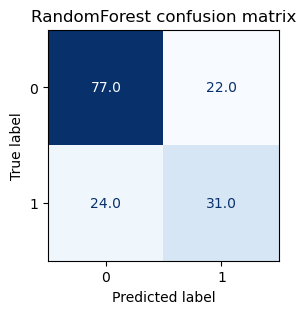

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Optimized parameters for SVM: {'C': 1, 'gamma': 0.0001}
Test accuracy for SVM: 0.7402597402597403
Test precision for SVM: 0.7419354838709677


<Figure size 300x300 with 0 Axes>

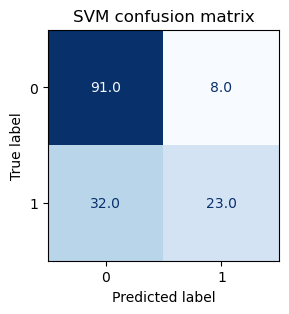

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

models = {
    'LogisticRegression': LogisticRegression(max_iter =200),
    'KNN': KNeighborsClassifier(),
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(),
    'SVM': SVC()
}

param_grids = {
    'LogisticRegression': {
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['lbfgs', 'liblinear', 'saga']
    },
    'KNN': {
        'n_neighbors': [5, 10, 15, 20, 25],
    },
    'DecisionTree': {
        'max_depth': [None, 10, 20, 30, 40],
        'min_samples_split': [2, 5, 10, 15, 20]
    },
    'RandomForest': {
        'n_estimators': [10, 50, 100, 200, 500],
        'max_features': ['sqrt', 'log2', None]
    },
    'SVM': {
        'C': [0.1, 1, 10, 100],
        'gamma': [1e-4, 1e-3, 1e-2, 1e-1, 1]
    }
}

best_estimators = {}
for model_name in models:
    grid_search = GridSearchCV(estimator=models[model_name], param_grid=param_grids[model_name], cv=5, n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)
    best_estimators[model_name] = grid_search.best_estimator_
    print(f'Optimized parameters for {model_name}: {grid_search.best_params_}')
    
    y_pred = grid_search.predict(X_test)
    print(f'Test accuracy for {model_name}: {accuracy_score(y_test, y_pred)}')
    print(f'Test precision for {model_name}: {precision_score(y_test, y_pred)}')
    cm = confusion_matrix(y_test, y_pred)
    plt.figure()
    plt.rcParams['figure.figsize'] = [3, 3]
    disp_test = ConfusionMatrixDisplay(cm, display_labels=np.arange(2))
    disp_test.plot(cmap=plt.cm.Blues,colorbar=False , values_format='.1f')
    plt.title(f'{model_name} confusion matrix')
    plt.savefig(f'{model_name} confusion.png', dpi=300, bbox_inches='tight')
    plt.show()

In [22]:
from mlxtend.evaluate import bias_variance_decomp

DecisionTree = DecisionTreeClassifier(max_depth = 10, min_samples_split = 20)
RandomForest = RandomForestClassifier(max_features = 'log2', n_estimators = 50)

X_train=X_train.values
X_test=X_test.values
y_train=y_train.values
y_test=y_test.values

# Decision Tree
avg_expected_loss_dt, avg_bias_dt, avg_var_dt = bias_variance_decomp(
    DecisionTree, X_train, y_train, X_test, y_test, loss='0-1_loss', random_seed=1)
print(f"Decision Tree --> Bias: {avg_bias_dt:.4f}, Variance: {avg_var_dt:.4f}")
# Random Forest
avg_expected_loss_rf, avg_bias_rf, avg_var_rf = bias_variance_decomp(
    RandomForest, X_train, y_train, X_test, y_test, loss='0-1_loss', random_seed=1)

print(f"Random Forest --> Bias: {avg_bias_rf:.4f}, Variance: {avg_var_rf:.4f}")


Decision Tree --> Bias: 0.2597, Variance: 0.2206
Random Forest --> Bias: 0.2338, Variance: 0.1063
